In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
#imports 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math 
import seaborn as sns


In [7]:
#upload from google drive into colab
df = pd.read_csv('/content/drive/My Drive/Data_Science_Bootcamp/homeprices_applied_econ.csv')

In [ ]:
#Do homes with air conditioning have a higher sales price than homes without air conditioning?
#Do homes with a full basement have a higher sales price than homes without a full basement?

In [8]:
df.keys()

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [13]:
df[df['airco'] == 'yes'].describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,85880.589595,5855.635838,3.138728,1.421965,2.184971,0.890173
std,28463.438869,1973.752600,0.640995,0.550879,1.078546,0.911532
min,31900.000000,2175.000000,2.000000,1.000000,1.000000,0.000000
25%,66000.000000,4510.000000,3.000000,1.000000,1.000000,0.000000
50%,82000.000000,6000.000000,3.000000,1.000000,2.000000,1.000000
75%,103000.000000,6600.000000,3.000000,2.000000,3.000000,2.000000
max,190000.000000,15600.000000,5.000000,4.000000,4.000000,3.000000


In [14]:
df[df['airco'] == 'no'].describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,373.000000,373.00000,373.000000,373.000000,373.000000,373.000000
mean,59884.852547,4823.10992,2.884718,1.222520,1.632708,0.600536
std,21338.739442,2178.79488,0.765596,0.465275,0.685254,0.822205
min,25000.000000,1650.00000,1.000000,1.000000,1.000000,0.000000
25%,45000.000000,3450.00000,2.000000,1.000000,1.000000,0.000000
50%,55500.000000,4050.00000,3.000000,1.000000,2.000000,0.000000
75%,70000.000000,5985.00000,3.000000,1.000000,2.000000,1.000000
max,175000.000000,16200.00000,6.000000,3.000000,4.000000,3.000000


In [20]:
df[df['airco'] == 'no']['price']

0       42000.0
1       66000.0
2       83800.0
3       45000.0
4       65900.0
         ...   
368    102000.0
369    110000.0
370     70000.0
371     85000.0
372     85000.0
Name: price, Length: 373, dtype: float64

In [21]:
stats.ttest_ind(df[df['airco'] == 'yes']['price'], df[df['airco'] == 'no']['price'])
# t=11.86, pvalue = very small
# yes, very significant difference in sale price between homes with and without airconditioning

Ttest_indResult(statistic=11.862852780650169, pvalue=4.972721571759431e-29)

In [22]:
stats.ttest_ind(df[df['fullbase'] == 'yes']['price'], df[df['fullbase'] == 'no']['price'])
# t=4.42, pvalue = very small
# yes, very significant difference in sale price between homes with and without a full basement 

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

(array([ 48., 131.,  99.,  50.,  29.,   6.,   4.,   4.,   1.,   1.]),
 array([ 25000.,  40000.,  55000.,  70000.,  85000., 100000., 115000.,
        130000., 145000., 160000., 175000.]),
 <a list of 10 Patch objects>)

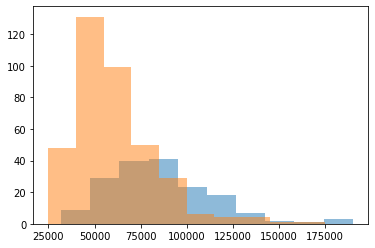

In [27]:
plt.hist(df[df['airco'] == 'yes']['price'], alpha=.5)
plt.hist(df[df['airco'] == 'no']['price'], alpha=.5)

(array([ 55., 119.,  80.,  44.,  30.,  16.,   7.,   2.,   0.,   2.]),
 array([ 25000.,  41500.,  58000.,  74500.,  91000., 107500., 124000.,
        140500., 157000., 173500., 190000.]),
 <a list of 10 Patch objects>)

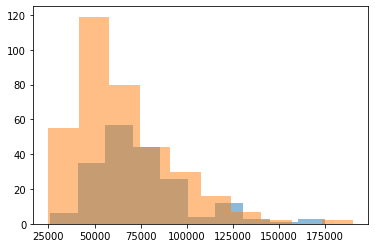

In [28]:
plt.hist(df[df['fullbase'] == 'yes']['price'], alpha=.5)
plt.hist(df[df['fullbase'] == 'no']['price'], alpha=.5)

In [30]:
print(stats.describe(df[df['fullbase'] == 'no']['price']))
print(stats.describe(df[df['fullbase'] == 'yes']['price']))
print(stats.describe(df[df['airco'] == 'no']['price']))
print(stats.describe(df[df['airco'] == 'yes']['price']))

DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)
DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)
DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)


In [31]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


In [34]:
get_95_ci(df[df['airco'] == 'yes']['price'], df[df['airco'] == 'no']['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -30758.09492994282 and -21233.379166974857.'

In [35]:
get_95_ci(df[df['fullbase'] == 'yes']['price'], df[df['fullbase'] == 'no']['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -15032.294775656886 and -5801.544262762097.'

[[Text(0, 0, 'fullbase_yes'), Text(0, 0, 'fullbase_no')]]

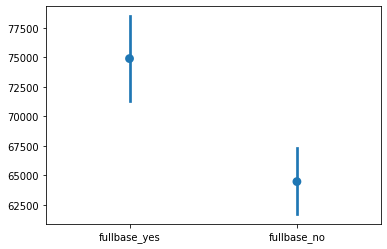

In [37]:
g = sns.pointplot(data=[df[df['fullbase'] == 'yes']['price'], df[df['fullbase'] == 'no']['price']], join=False)
                        
g.set(xticklabels = ['fullbase_yes', 'fullbase_no'])

[[Text(0, 0, 'airco_yes'), Text(0, 0, 'airco_no')]]

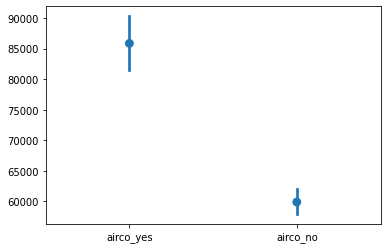

In [38]:
g = sns.pointplot(data=[df[df['airco'] == 'yes']['price'], df[df['airco'] == 'no']['price']], join=False)
                        
g.set(xticklabels = ['airco_yes', 'airco_no'])